<h1>Mantenimiento predictivo</h1>

### *Contexto del problema y objetivos*

Se busca hacer un mantenimiento predictivo de maquinaria, en particular de un molino SAG, en la que se buscarán hacer las sigueintes tareas:

*   Regresión: Predecir la vida útil restante (RUL), o el tiempo hasta el fallo (TTF).
*   Clasificación binaria: Predecir si un activo fallará en un plazo determinado (por ejemplo, días).
*   Clasificación multiclase: Predecir si un activo fallará en diferentes ventanas temporales: Por ejemplo, fallará en la ventana [1, ω0] días; fallará en la ventana [ω0+1, ω1] días; no fallará en w1 días.

### Descripción de los datos

*   **Corriente (A):** Corriente suministrada al ventilador
*   **Voltaje(V):** Tensión a la que funciona el ventilador.
*   **Frecuencia (Hz):** Frecuencia eléctrica a la que funciona el ventilador.
*   **Potencia (kW):** Potencia consumida por el ventilador.
*   **Humedad(%):** Humedad del ambiente.
*   **Presion dinamica ("H2O):** Presión dinámica del ventilador
*   **Presion estatica ("H2O):** Presión estática del ventilador
*   **Presion STALL ("H2O):** Presión de bloqueo del ventilador
*   **Temperatura Motor:** Temperatura a la que se encuentra el motor.
*   **Temperatura Rodamiento:** Temperatura a la que se encuentra el
del motor.
*   **Vibracion Motor(mm/s):** Vibración del motor en ese instante
*   **Vibracion Rodamiento(mm/s):** Vibración del cojinete del motor en ese
momento
*   **Running:** Fan operating status
*   **Energia Acumulada (kWh)**

# Carga de datos 📂

El primer paso es obtener los datos, en este caso se usa la función **load_data**, la cual se encuentra definida al final de esta libreta, esta función recibe como argumentos la ruta donde se encuentra el archivo que se desea cargar y el nombre del archivo que se desea cargar. La función devuelve un DataFrame de pandas con los datos, este DataFrame se guarda con el nombre "data". Con esto podemos comenzar por realizar toda la preparación y pre-procesamiento antes de realizar cualquier entrenamiento.

In [ ]:
data = load_data('Path a los datos', 'Data.xlsx')
data.head(5)

loaded file: /content/gdrive/MyDrive/PY_PROJECTS/ALGORITHMICA/ASESORIAS/JOSSHET - MANTENIMIENTO/Dataset/USAR ESTOS DATOS RB_206.xlsx


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 19,Unnamed: 20,RB-206/VEN-0056-YA,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,NaN,Corriente(A),NaN,Frecuencia(Hz),NaN,Voltaje(V),NaN,Energia Acumulada(kWh),NaN,Humedad(%),...,Temperatura Motor,NaN,Temperatura Rodamiento,NaN,Vibración Motor,NaN,Vibración Rodamiento,NaN,Running,NaN
1,NaN,2020-02-23 00:00:00,188.792221,2020-02-23 00:00:00,60.090611,2020-02-23 00:00:00,439.269989,2020-02-23 00:00:00,No Data,2020-02-23 00:00:00,...,2020-02-23 00:00:00,34.378162,2020-02-23 00:00:00,37.17318,2020-02-23 00:00:00,11.175677,2020-02-23 00:00:00,7.716679,2020-02-23 00:00:00,1
2,NaN,2020-02-23 00:01:00,188.052139,2020-02-23 00:01:00,60.095604,2020-02-23 00:01:00,440.150452,2020-02-23 00:01:00,No Data,2020-02-23 00:01:00,...,2020-02-23 00:01:00,34.380249,2020-02-23 00:01:00,37.107059,2020-02-23 00:01:00,11.261617,2020-02-23 00:01:00,7.640666,2020-02-23 00:01:00,1
3,NaN,2020-02-23 00:02:00,189.072205,2020-02-23 00:02:00,60.100597,2020-02-23 00:02:00,443.889587,2020-02-23 00:02:00,No Data,2020-02-23 00:02:00,...,2020-02-23 00:02:00,34.382336,2020-02-23 00:02:00,37.040939,2020-02-23 00:02:00,11.261415,2020-02-23 00:02:00,7.762151,2020-02-23 00:02:00,1
4,NaN,2020-02-23 00:03:00,188.746323,2020-02-23 00:03:00,60.105591,2020-02-23 00:03:00,441.251678,2020-02-23 00:03:00,No Data,2020-02-23 00:03:00,...,2020-02-23 00:03:00,34.384422,2020-02-23 00:03:00,37.090343,2020-02-23 00:03:00,11.199166,2020-02-23 00:03:00,7.895481,2020-02-23 00:03:00,1


Vemos la distribución de los datos al cargar el archivo .xlsx, por lo que procedemos a acomodar los datos de tal forma que nos quedemos con los valores y nos quitemos las fechas que vienen por cada columna para solo ponerlo en la primera como refrencia. Construimos entonces nuestro nuevo dataset df

In [ ]:
# Obtenemos los encabezados correctos
head = data.iloc[0].values.tolist()
mi_lista_sin_nan = list(filter(lambda valor: valor == valor, head))  # NaN no es igual a sí mismo
mi_lista_sin_nan = ['fecha'] + mi_lista_sin_nan

# Crea un nuevo DataFrame con las columnas seleccionadas por número
columnas_a_conservar  = [1,2,4,6,8,10,12,14,16,18,20,22,24,26,28]
df = data.iloc[:, columnas_a_conservar]
# Eliminamos la primera fila, para no tener repetidos los encabezados
df = df.iloc[1:]
#Establecemos las columnas
df.columns = mi_lista_sin_nan

Ahora se observan las primeras 5 filas de los datos para poder conocer un poco más sobre el contenido de este DataFrame y asegurarnos que se cargaron correctamente columnas, filas y los encabezados están en orden. De no ser así se tendrían que realizar pasos extra para acomodar características adecuadamente.

In [ ]:
df.head(-5)

Antes de poder usar algoritmos de Machine Learning, se deben poner los datos en un formato adecuado para que el algoritmo pueda aprender de ellos, además de esto, se deben eliminar valores NaN u otros valores que pudieran afectar al desempeño del modelo, esto se realiza en la sección de limpieza y preparación de los datos.

# Limpieza y preparación de datos 🧹

## Exploración 🔎

Usando la función **data_exploration** definida al final de esta libreta se puede obtener un análisis de todas las columnas en el DataFrame, esta función brinda información como el tipo de datos presentes en cada columna, el número de valores nulos y el número de valores únicos. La función data_exploration() devulve un DataFrame con los datos antes mencionados.
Dada la exploración de los tipos de datos leídos por pandas y el numero de valores unicos y nulos se podrían hacer diferentes pasos si hay algún error en el tipo de dato, si hay valores duplicados o si hay valores inexistentes.

In [ ]:
data_exploration(df)

,fecha,Corriente(A),Frecuencia(Hz),Voltaje(V),Energia Acumulada(kWh),Humedad(%),Potencia (KW),Presion Dinamica,Presion Estatica,Presion Stall,Temperatura Motor,Temperatura Rodamiento,Vibración Motor,Vibración Rodamiento,Running
type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
null_counts,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
uniques,735841,511213,71550,490004,525802,461445,570318,642432,637272,648283,568495,554267,601785,607759,3


Vemos que no se detecta correctamente el tipo de dato, por lo que convertimos los valores a flotantes a excepcion de la primera columna y transformamos los No Data.

**Reemplazamos los valores NaN**

In [ ]:
# Reemplaza los valores no numéricos con NaN
columnas_a_cambiar = df.columns[1:]  # Selecciona todas las columnas a partir de la segunda
df[columnas_a_cambiar] = df[columnas_a_cambiar].apply(pd.to_numeric, errors='coerce')

# Cambia el tipo de dato a float en las columnas restantes
df[columnas_a_cambiar] = df[columnas_a_cambiar].astype(float)

**Quitamos las filas con valores no numericos**

In [ ]:
# Elimina las filas con NaN en las columnas a convertir
df.dropna(subset=columnas_a_cambiar, inplace=True)

# Cambia el tipo de dato a float en las columnas restantes
df[columnas_a_cambiar] = df[columnas_a_cambiar].astype(float)
df['Running'] = df['Running'].astype(int)


Revisamos de nuevo la exploración y hacemos además una breve exploración estadistica con la función describe() de pandas, cuestiones como media, desviación estandar entre otras.

In [ ]:
data_exploration(df)

In [ ]:
df.describe()

,Corriente(A),Frecuencia(Hz),Voltaje(V),Energia Acumulada(kWh),Humedad(%),Potencia (KW),Presion Dinamica,Presion Estatica,Presion Stall,Temperatura Motor,Temperatura Rodamiento,Vibración Motor,Vibración Rodamiento,Running
count,527426.000000,527426.000000,527426.000000,5.274260e+05,527426.000000,527426.000000,527426.000000,527426.000000,527426.000000,527426.000000,527426.000000,527426.000000,527426.000000,527426.000000
mean,197.674284,60.023955,454.270177,7.903188e+05,72.484789,116.809381,0.337870,2.053425,-0.427797,46.332494,45.549767,3.966712,2.991620,0.759217
std,15.711725,0.195715,9.482531,2.970966e+05,27.739303,9.535637,0.231532,0.482702,1.736535,12.884526,3.994035,1.647828,0.781444,0.427559
min,0.071574,45.559807,225.086624,2.830316e+05,0.000000,-63.652515,-11.000000,-11.000000,-11.000000,-108.694389,-140.790176,0.008291,0.009187,0.000000
25%,195.163692,59.983158,448.182465,5.327232e+05,63.400656,115.057714,0.266208,1.824600,-1.822180,37.728477,44.046611,2.450822,2.535290,1.000000
50%,197.515610,60.035534,453.059235,7.856120e+05,82.801121,116.917934,0.319806,2.028081,-1.370715,40.003300,45.976812,2.734063,2.826068,1.000000
75%,201.064541,60.076759,458.808372,1.045913e+06,91.854050,120.392071,0.422545,2.354732,0.868110,54.116386,47.193493,5.603839,3.651172,1.000000
max,904.685974,60.255062,492.821320,1.314510e+06,99.999924,233.926605,0.788336,2.886226,3.007576,1640.811157,1582.367310,8.238268,6.165398,1.000000


## Preparación de los datos 👍

Nos encargamos ahora del preprocesamiento de los datos, realizamos las siguientes tareas y las necesarias según las necesidades de los datos.

- Tratamiento de valores perdidos
- Ingeniería de características
- Preparación de los datos para la modelización
- Eliminación de columnas innecesarias

Definimos primero las funciones necesarias para llevar a cabo el preprocesamiento, que son directament para detectar valores duplicados y valores anormales o atipicos.

In [ ]:
def duplicate_values(dataset):
  dup = dataset.duplicated()
  total_dup = dup.sum()
  return dataset[dup], total_dup

def outliers_detection(dataset, threshold=3):
  total_outliners = 0
  outliers = pd.DataFrame()
  #dataset = dataset.drop('age', axis=1)
  for column in dataset.columns:
    if dataset[column].dtype == 'object':
      # Si la columna es categórica, no se detectan valores atípicos
      continue
    series = dataset[column]
    mean = series.mean()
    deviation = series.std()
    upper_threshold = mean + (threshold * deviation)
    lower_threshold = mean - (threshold * deviation)
    outliers_column = series[(series > upper_threshold) | (series < lower_threshold)]
    outliers[column] = outliers_column
    total_outliners += len(outliers_column)

  return outliers, total_outliners

def varianceTreshold_analysis(data:pd.DataFrame) -> np.array:
  # Intuitivamente significa que eliminaremos los atributos que sean igual en proporción mayor o igual a 80%
  sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
  df_2 = pd.DataFrame(sel.fit_transform(data))
  return df_2

Preguntamos por los valores repetidos en el conjunto de datos y por los valores atípicos que puedan existir, tomando un criterio de 3 veces la desviación típica por característica (de no categórica).

In [ ]:
duplicados, total_dup = duplicate_values(df)
print(f"The number of duplicate values in the dataset is {total_dup} ")

atipicos, total_atipic = outliers_detection(df)
print(f"The number of outliers in the dataset is {total_atipic} \n")

The number of duplicate values in the dataset is 0 
The number of outliers in the dataset is 17783 



Eliminamos las columnas innecesarias

In [ ]:
columnas_eliminar = ['fecha']
data2 = df.drop(columnas_eliminar, axis=1)
data2.head()

Hacemos un histograma para obtener una imagen intuitiva de la relación entre las variables.

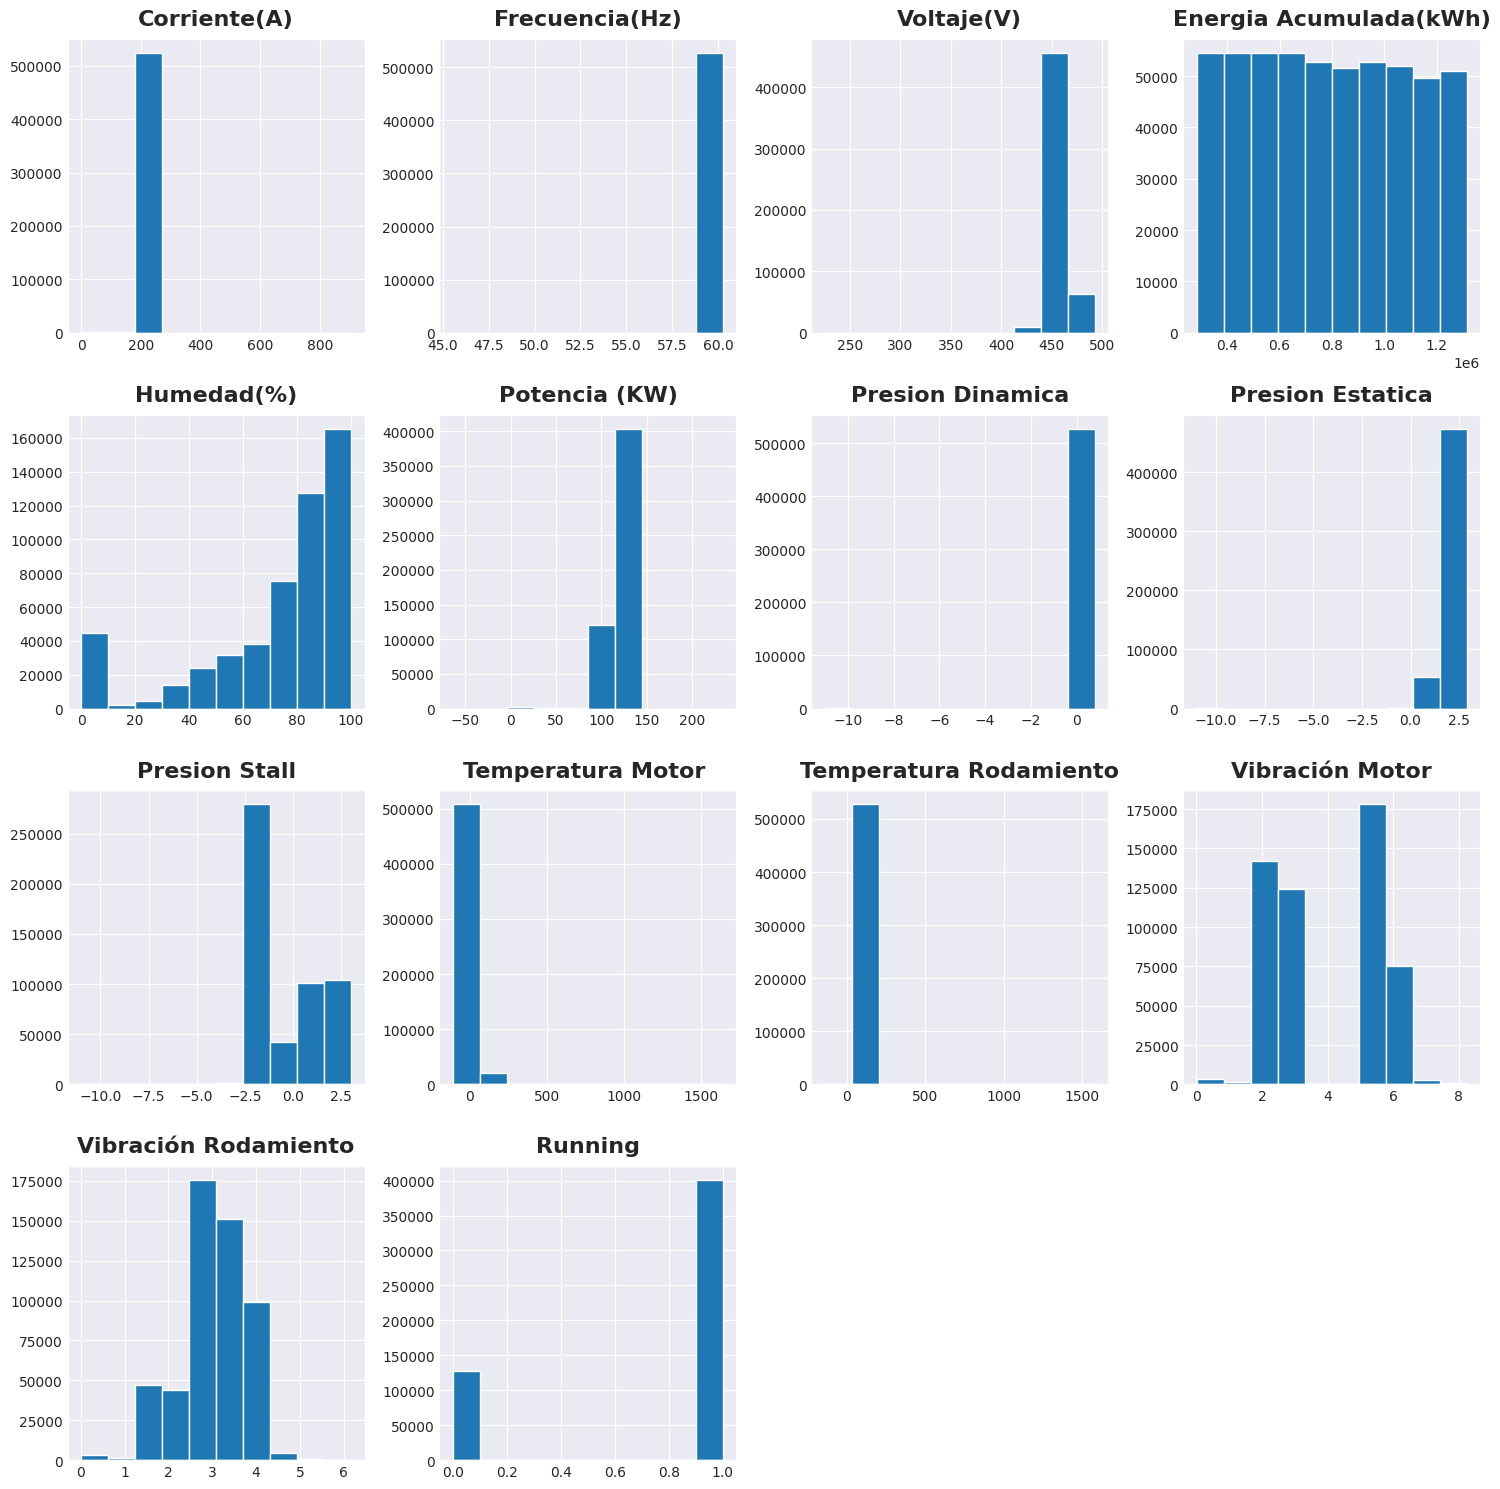

In [ ]:
sns.set_style("darkgrid")
data2.hist(figsize=(15,15))
plt.show()

Separamos los datos de la predicción y hacemos que coincidan los indices

In [ ]:
y = data2['Running']
X = data2.drop('Running', axis=1)

### Análisis de los datos bivariantes (Bivariate Analysis)



Como primer análisis a nuestras nuevas features hacemos un Bivariate Analysis para averiguar la relación que existe entre columnas. Calculamos la matriz de correlación entre variables.

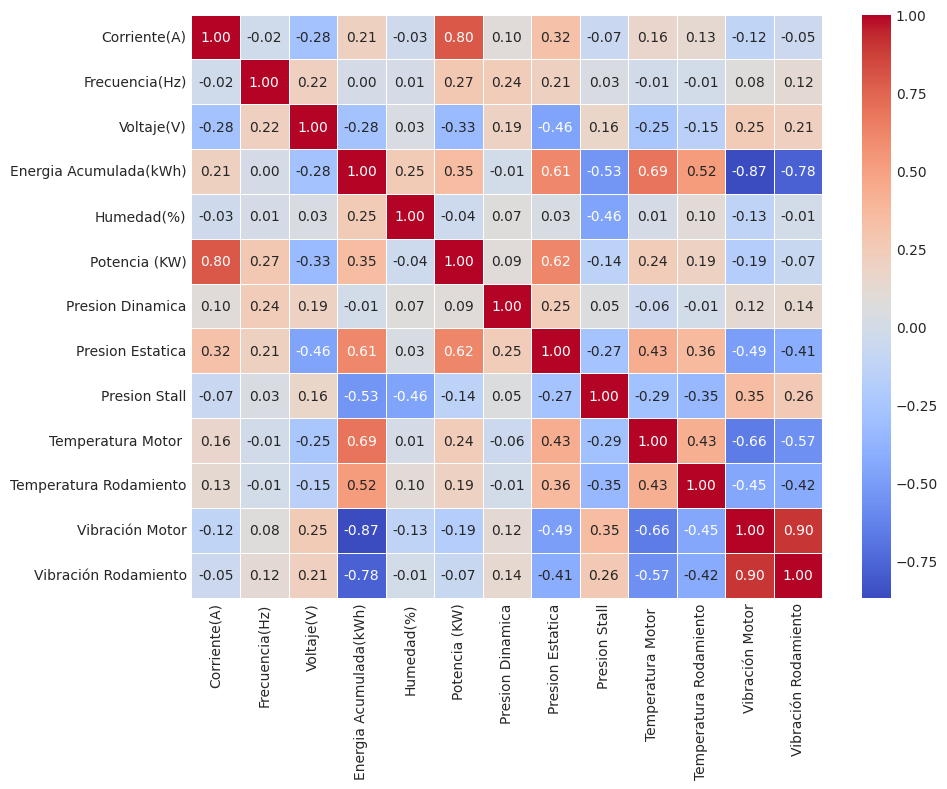

In [ ]:
correlation_matrix = X.corr()

# Visializamos la matriz de correlación en un heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Ajustamos los límites de los ejes para evitar recortar los bordes del heat map
plt.ylim(len(correlation_matrix), 0)
plt.xlim(0, len(correlation_matrix))
# Mostrar el heat map
plt.show()

# Identificamos las variables altamente correlacionadas
correlated_variables = correlation_matrix[correlation_matrix > 0.8]

En general, no hay correlación alta entre cada variable, el mayor registrado es de 0.29 y corresponde a una correlación entre evento y mes, lo cual tiene sentido por como se estructuran los juegos en las temporadas. En general, este primer filtro nos dice que no hay ninguna correlación grande entre variables que nos permita despreciar alguna.

Como segunda prueba hacemos este mismo analisis pero con un umbral de varianzas para tener cuantitativamente confirmada la observación anterior, además quitamos de nuestro analisis la variable a predecir para ya hacer la preparación y segmentación de datos de entrenamiento y prueba.

In [ ]:
# Hacemos un análisis de umbral de varianza
data_VT = data2.drop('Running', axis=1)
y_VT = data2['Running']

X_VT = varianceTreshold_analysis(data_VT)
X_VT.head()

,0,1,2,3,4,5,6,7,8,9,10
0,188.544754,466.571320,283031.5625,0.0,107.878792,1.219523,2.402114,37.176155,40.892403,5.428632,3.648756
1,189.185410,466.514526,283033.3750,0.0,107.399109,1.221588,2.404319,37.083176,40.895622,5.441591,3.648756
2,189.472794,466.540131,283035.1875,0.0,108.037270,1.223654,2.406524,37.185993,40.719498,5.426879,3.648756
3,188.294678,466.214447,283037.0000,0.0,107.922821,1.225719,2.408729,37.123634,40.795509,5.411417,3.648756
4,188.152893,465.654999,283038.8125,0.0,107.407806,1.227784,2.410934,37.061275,40.848297,5.419637,3.648756


Dado lo calculado anteriormente, no hay señales de correlación alta entre las variables, esto lo podemos decir por que se conservó el numero de columnas en este umbral, así que haremos el entrenamiento con todas las características propuestas.

# Ingeniería de características 👷

Procedemos en este apartado a seleccionar y preparar las carácteristicas para dar de entrada a los modelos de ML. Aunado al analisis de datos bivariantes crearemos diferentes conjuntos de datos seleccionando segun cada analisis las características más relevantes para la clasificación. Posteriormente buscaremos ademas estandarizar y normalizar nuestros datos.

## Selección de características


### *Bivariate Analysis data*

En este caso nos quedamos con 11 de las 13 características originales.

In [ ]:
# Hacemos un análisis de umbral de varianza
data_VT = data2.drop('Running', axis=1)
y_VT = data2['Running']

X_VT = varianceTreshold_analysis(data_VT)
X_VT.head()

,0,1,2,3,4,5,6,7,8,9,10
0,188.544754,466.571320,283031.5625,0.0,107.878792,1.219523,2.402114,37.176155,40.892403,5.428632,3.648756
1,189.185410,466.514526,283033.3750,0.0,107.399109,1.221588,2.404319,37.083176,40.895622,5.441591,3.648756
2,189.472794,466.540131,283035.1875,0.0,108.037270,1.223654,2.406524,37.185993,40.719498,5.426879,3.648756
3,188.294678,466.214447,283037.0000,0.0,107.922821,1.225719,2.408729,37.123634,40.795509,5.411417,3.648756
4,188.152893,465.654999,283038.8125,0.0,107.407806,1.227784,2.410934,37.061275,40.848297,5.419637,3.648756


In [ ]:
#Hacemos estandarización y normalización

# Estandarización
scaler = StandardScaler()
X_VT = scaler.fit_transform(X_VT)
# Normalización
scaler = MinMaxScaler()
X_VT = scaler.fit_transform(X_VT)

### *Backward Elimination*

In [ ]:
import statsmodels.api as sm

# Agregar una columna de unos para representar el intercepto
X = sm.add_constant(X)

# Inicializar el modelo y realizar la eliminación hacia atrás
model = sm.OLS(y, X).fit()

# Obtener las p-values
p_values = model.pvalues

# Seleccionar características basadas en el umbral de p-values
selected_features = list(X.columns[p_values <= 0.05])

# Crear un nuevo conjunto de datos con características seleccionadas
X_backward = X[selected_features]
X_backward.head()

,const,Corriente(A),Frecuencia(Hz),Voltaje(V),Energia Acumulada(kWh),Humedad(%),Presion Dinamica,Presion Estatica,Presion Stall,Temperatura Motor,Temperatura Rodamiento,Vibración Motor,Vibración Rodamiento
204242,1.0,188.544754,60.028641,466.571320,283031.5625,0.0,0.421213,1.219523,2.402114,37.176155,40.892403,5.428632,3.648756
204243,1.0,189.185410,60.028679,466.514526,283033.3750,0.0,0.420063,1.221588,2.404319,37.083176,40.895622,5.441591,3.648756
204244,1.0,189.472794,60.028717,466.540131,283035.1875,0.0,0.418913,1.223654,2.406524,37.185993,40.719498,5.426879,3.648756
204245,1.0,188.294678,60.028755,466.214447,283037.0000,0.0,0.417763,1.225719,2.408729,37.123634,40.795509,5.411417,3.648756
204246,1.0,188.152893,60.028793,465.654999,283038.8125,0.0,0.416613,1.227784,2.410934,37.061275,40.848297,5.419637,3.648756


In [ ]:
#Hacemos estandarización y normalización

# Estandarización
scaler = StandardScaler()
X_backward = scaler.fit_transform(X_backward)
# Normalización
scaler = MinMaxScaler()
X_backward = scaler.fit_transform(X_backward)

### *Recursive Feature Elimination*

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

# Inicializar el modelo de regresión y realizar la eliminación de características recursivas
model = LinearRegression()
rfecv = RFECV(estimator=model, step=1, scoring='neg_mean_squared_error')
rfecv.fit(X, y)

# Obtener las características seleccionadas
selected_features = list(X.columns[rfecv.support_])

# Crear un nuevo conjunto de datos con características seleccionadas
X_rfecv = X[selected_features]
X_rfecv.head()

,Presion Dinamica
204242,0.421213
204243,0.420063
204244,0.418913
204245,0.417763
204246,0.416613


In [ ]:
#Hacemos estandarización y normalización

# Estandarización
scaler = StandardScaler()
X_backward = scaler.fit_transform(X_backward)
# Normalización
scaler = MinMaxScaler()
X_backward = scaler.fit_transform(X_backward)

### *Decision Trees, Extra Trees y Random Forest*

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

# Inicializar modelos de árbol y bosque
tree_model = DecisionTreeClassifier(random_state=42)
extra_trees_model = ExtraTreesClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

# Entrenar modelos
tree_model.fit(X, y)
extra_trees_model.fit(X, y)
random_forest_model.fit(X, y)

# Obtener importancia de características
tree_features = list(X.columns[tree_model.feature_importances_ > 0.01])
extra_trees_features = list(X.columns[extra_trees_model.feature_importances_ > 0.01])
random_forest_features = list(X.columns[random_forest_model.feature_importances_ > 0.01])

# Crear nuevos conjuntos de datos con características seleccionadas
X_tree = X[tree_features]
X_extra_trees = X[extra_trees_features]
X_random_forest = X[random_forest_features]

In [ ]:
X_tree.head()

,Energia Acumulada(kWh),Humedad(%),Presion Dinamica,Presion Estatica,Presion Stall,Temperatura Motor,Vibración Motor
204242,283031.5625,0.0,0.421213,1.219523,2.402114,37.176155,5.428632
204243,283033.3750,0.0,0.420063,1.221588,2.404319,37.083176,5.441591
204244,283035.1875,0.0,0.418913,1.223654,2.406524,37.185993,5.426879
204245,283037.0000,0.0,0.417763,1.225719,2.408729,37.123634,5.411417
204246,283038.8125,0.0,0.416613,1.227784,2.410934,37.061275,5.419637


In [ ]:
#Hacemos estandarización y normalización

# Estandarización
scaler = StandardScaler()
X_tree = scaler.fit_transform(X_tree)
# Normalización
scaler = MinMaxScaler()
X_tree= scaler.fit_transform(X_tree)

In [ ]:
X_extra_trees.head()

,Corriente(A),Frecuencia(Hz),Voltaje(V),Energia Acumulada(kWh),Humedad(%),Potencia (KW),Presion Dinamica,Presion Estatica,Presion Stall,Temperatura Motor,Temperatura Rodamiento,Vibración Motor,Vibración Rodamiento
204242,188.544754,60.028641,466.571320,283031.5625,0.0,107.878792,0.421213,1.219523,2.402114,37.176155,40.892403,5.428632,3.648756
204243,189.185410,60.028679,466.514526,283033.3750,0.0,107.399109,0.420063,1.221588,2.404319,37.083176,40.895622,5.441591,3.648756
204244,189.472794,60.028717,466.540131,283035.1875,0.0,108.037270,0.418913,1.223654,2.406524,37.185993,40.719498,5.426879,3.648756
204245,188.294678,60.028755,466.214447,283037.0000,0.0,107.922821,0.417763,1.225719,2.408729,37.123634,40.795509,5.411417,3.648756
204246,188.152893,60.028793,465.654999,283038.8125,0.0,107.407806,0.416613,1.227784,2.410934,37.061275,40.848297,5.419637,3.648756


In [ ]:
#Hacemos estandarización y normalización

# Estandarización
scaler = StandardScaler()
X_extra_trees = scaler.fit_transform(X_extra_trees)
# Normalización
scaler = MinMaxScaler()
X_extra_trees = scaler.fit_transform(X_extra_trees)

In [ ]:
X_random_forest.head()

,Corriente(A),Frecuencia(Hz),Voltaje(V),Energia Acumulada(kWh),Humedad(%),Potencia (KW),Presion Dinamica,Presion Estatica,Presion Stall,Temperatura Motor,Temperatura Rodamiento,Vibración Motor,Vibración Rodamiento
204242,188.544754,60.028641,466.571320,283031.5625,0.0,107.878792,0.421213,1.219523,2.402114,37.176155,40.892403,5.428632,3.648756
204243,189.185410,60.028679,466.514526,283033.3750,0.0,107.399109,0.420063,1.221588,2.404319,37.083176,40.895622,5.441591,3.648756
204244,189.472794,60.028717,466.540131,283035.1875,0.0,108.037270,0.418913,1.223654,2.406524,37.185993,40.719498,5.426879,3.648756
204245,188.294678,60.028755,466.214447,283037.0000,0.0,107.922821,0.417763,1.225719,2.408729,37.123634,40.795509,5.411417,3.648756
204246,188.152893,60.028793,465.654999,283038.8125,0.0,107.407806,0.416613,1.227784,2.410934,37.061275,40.848297,5.419637,3.648756


In [ ]:
#Hacemos estandarización y normalización

# Estandarización
scaler = StandardScaler()
X_random_forest = scaler.fit_transform(X_random_forest)
# Normalización
scaler = MinMaxScaler()
X_random_forest = scaler.fit_transform(X_random_forest)

## División en entrenamiento y prueba

Ahora se divide el dataset en dos subsets, uno para entrenar el modelo y el otro para evaluar al modelo, estos subsets se conocen como set de entrenamiento y set de prueba, respectivamente.

Lo anterior es importante ya que el modelo debe evaluarse con datos que no haya visto antes, es decir, datos que no son parte del conjunto de datos con el que se entrenó, esto para evitar sesgar la evaluación y que pueda parecer que el modelo tiene un buen desempeño cuando en realidad puede estar "memorizando" los datos.

Esto se hace usando la función "train_test_split" de sklearn a la cual se le pasan las features y targets que se quieren dividir en entrenamiento y prueba, el tamaño del set de prueba que en este caso será el 10% del total de datos disponibles, y si se quieren mezclar o no los datos antes de dividir el dataset, en este caso, al estar trabajando con datos temporales, no se mezclan los datos ya que es importante el orden en el que estos están. La función devuelve las features para entrenamiento y para prueba, y los targets para entrenamiento y para prueba, lo anterior se almacena en las variables "X_train", "X_test", "y_train" y "y_test", respectivamente.

In [ ]:
# Dividir el dataset en entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

Ahora que ya se ha hecho el preprocesamiento de los datos, y se han obtenido las características que se usarán se puede pasar a entrenar el modelo para predicción.

# Modelos de entrenamiento 📈

Para realizar la clasificación se entrenarán diferentes modelos y se evaluarán ambos para determinar cuál de estos tres modelos es mejor para realizar las predicciones. Los modelos que se entrenarán son:

- Logistic Regression
- K- Nearest Neighbor
- Naïve Bayes
- Decision Trees
- adaboost


##Construcción de los modelos 🔨



A continuación, se inicializa cada uno de los modelos, se entrena el modelo con los datos de entrenamiento previamente obtenidos y se realizan predicciones sobre el set de prueba con el modelo entrenado. Se va a hacer el entrenamiento para cada caso de selección de características.

Preparamos y construimos cada modelo mencionado anteriormente tomando la misma estructura: Definición, entrenamiento y predicción.

### Regresión Logistica

Nos encargamos de hacer el entrenamiento para cada set de datos tomando las diferentes selecciones de caracteristicas.

#### *Original*

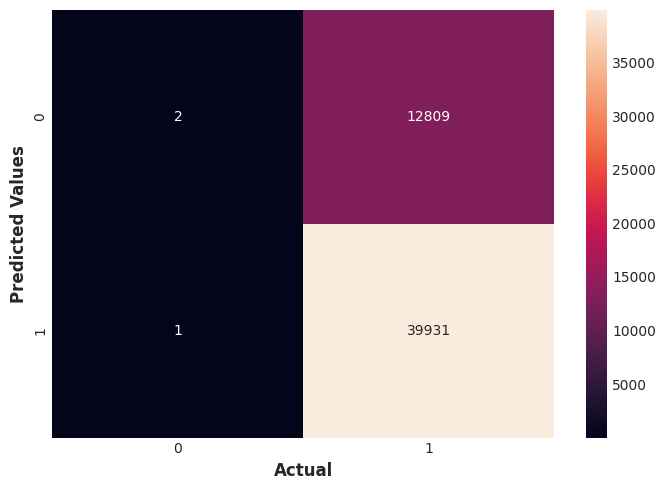

Accuracy: 0.757124168136056
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.00      0.00     12811
           1       0.76      1.00      0.86     39932

    accuracy                           0.76     52743
   macro avg       0.71      0.50      0.43     52743
weighted avg       0.74      0.76      0.65     52743



In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador
clf = LogisticRegression()
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_ori_RL = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

#### *Bivariate Analysis data*

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


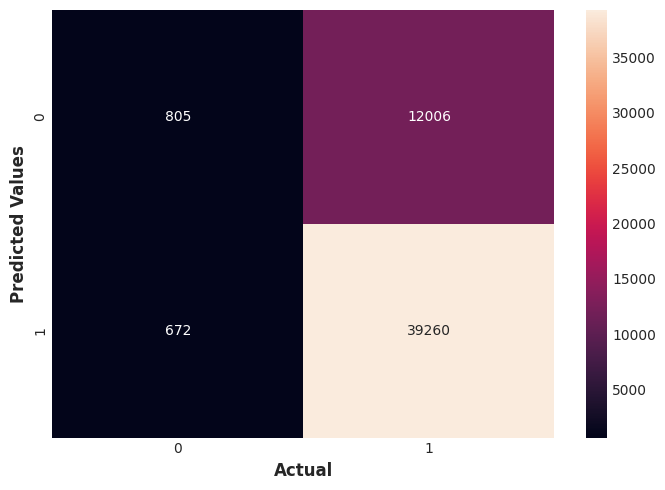

Accuracy: 0.7596268699163871
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.06      0.11     12811
           1       0.77      0.98      0.86     39932

    accuracy                           0.76     52743
   macro avg       0.66      0.52      0.49     52743
weighted avg       0.71      0.76      0.68     52743

Confusion Matrix:
 [[  805 12006]
 [  672 39260]]


In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_VT, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador
clf = LogisticRegression()
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_VT_RL = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)


#### *Backward Elimination*

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


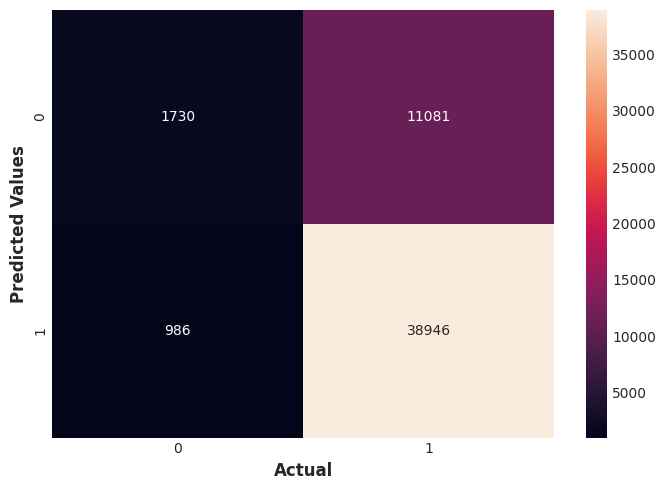


Accuracy: 0.7712113455814041

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.14      0.22     12811
           1       0.78      0.98      0.87     39932

    accuracy                           0.77     52743
   macro avg       0.71      0.56      0.54     52743
weighted avg       0.74      0.77      0.71     52743



In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_backward, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador
clf = LogisticRegression()
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_Back_RL = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)

#### *Recursive Feature Elimination*

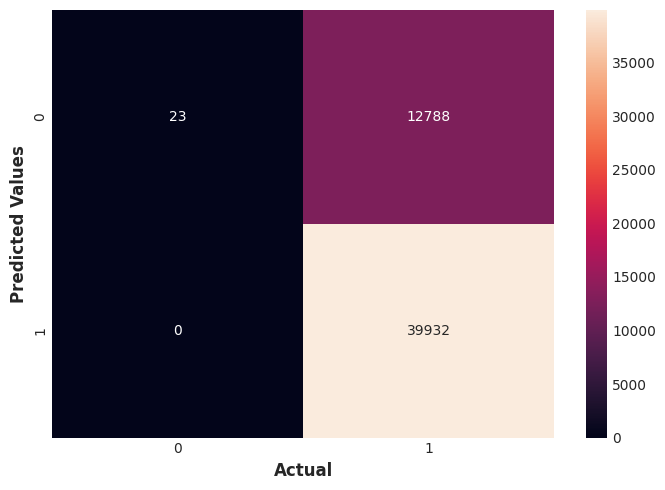


Accuracy: 0.7575412850994445

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00     12811
           1       0.76      1.00      0.86     39932

    accuracy                           0.76     52743
   macro avg       0.88      0.50      0.43     52743
weighted avg       0.82      0.76      0.65     52743



In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_rfecv, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador
clf = LogisticRegression()
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_Rec_RL = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)

#### *Decision Trees*

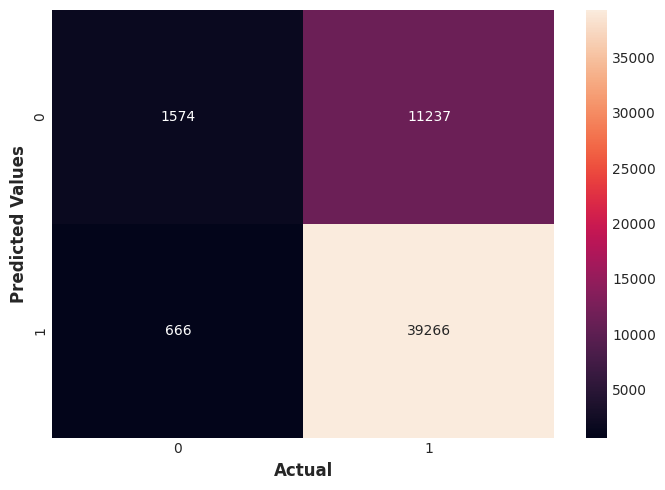


Accuracy: 0.7743207629448458

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.12      0.21     12811
           1       0.78      0.98      0.87     39932

    accuracy                           0.77     52743
   macro avg       0.74      0.55      0.54     52743
weighted avg       0.76      0.77      0.71     52743



In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_tree, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador
clf = LogisticRegression()
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_dt_RL = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)

#### *Extra Trees*

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


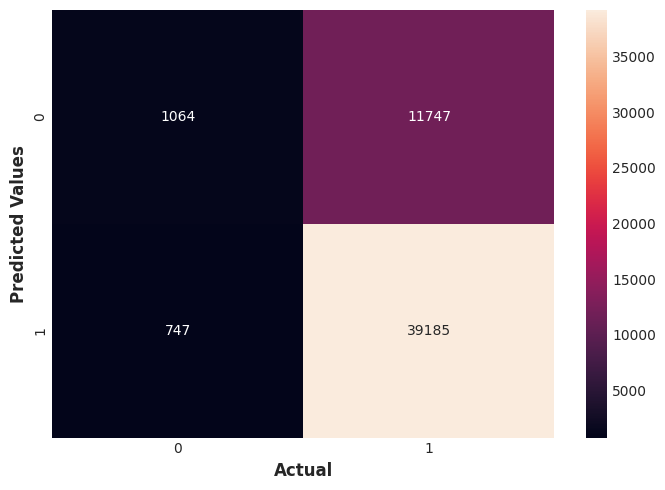


Accuracy: 0.7631154845192727

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.08      0.15     12811
           1       0.77      0.98      0.86     39932

    accuracy                           0.76     52743
   macro avg       0.68      0.53      0.50     52743
weighted avg       0.73      0.76      0.69     52743



In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_extra_trees, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador
clf = LogisticRegression()
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_extra_RL = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)

#### *Random Forest*

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


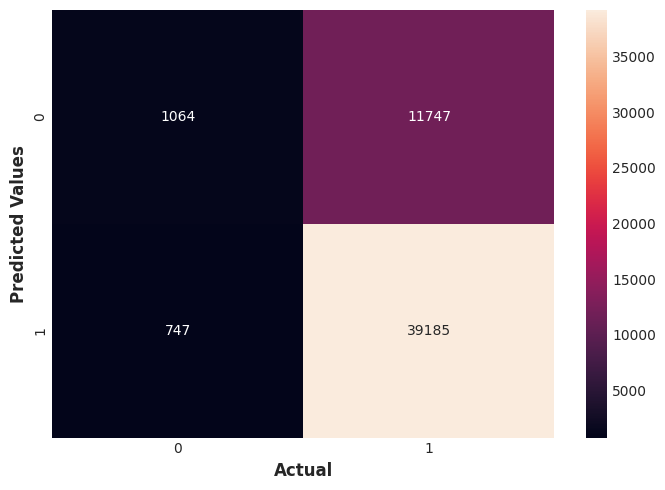


Accuracy: 0.7631154845192727

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.08      0.15     12811
           1       0.77      0.98      0.86     39932

    accuracy                           0.76     52743
   macro avg       0.68      0.53      0.50     52743
weighted avg       0.73      0.76      0.69     52743



In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_random_forest, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador
clf = LogisticRegression()
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_rf_RL = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)

### K-Nearest Neighbors (KNN)
Nos encargamos de hacer el entrenamiento para cada set de datos tomando las diferentes selecciones de caracteristicas.

#### *Original*

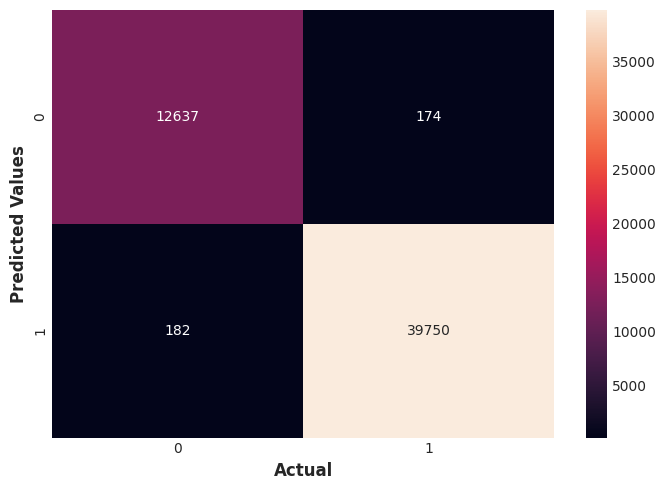

Accuracy: 0.993250289137895
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     12811
           1       1.00      1.00      1.00     39932

    accuracy                           0.99     52743
   macro avg       0.99      0.99      0.99     52743
weighted avg       0.99      0.99      0.99     52743



In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador con un valor de k (número de vecinos)
k = 3
clf = KNeighborsClassifier(n_neighbors=k)
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_ori_KNN = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

#### *Bivariate Analysis data*

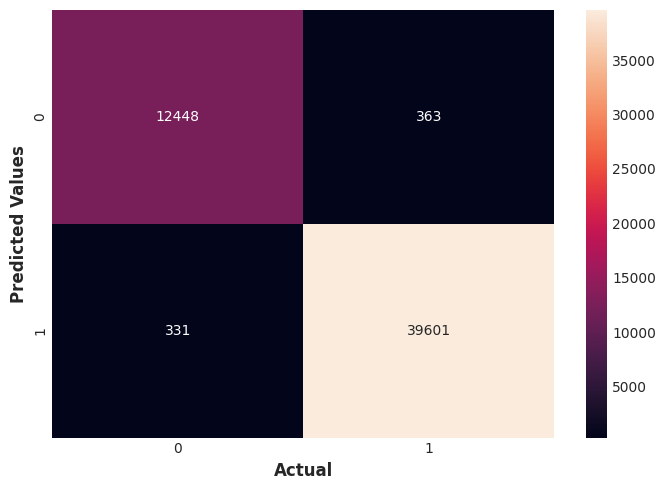

Accuracy: 0.9868418557912898
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     12811
           1       0.99      0.99      0.99     39932

    accuracy                           0.99     52743
   macro avg       0.98      0.98      0.98     52743
weighted avg       0.99      0.99      0.99     52743

Confusion Matrix:
 [[12448   363]
 [  331 39601]]


In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_VT, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador con un valor de k (número de vecinos)
k = 3
clf = KNeighborsClassifier(n_neighbors=k)
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_VT_KNN = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)


#### *Backward Elimination*

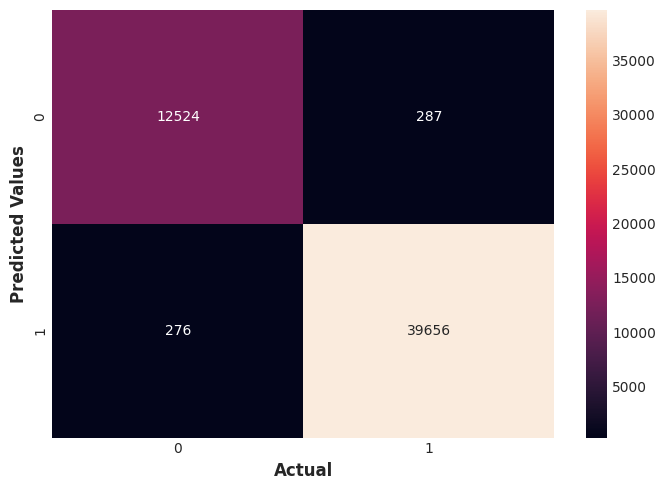


Accuracy: 0.9893255977096487

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     12811
           1       0.99      0.99      0.99     39932

    accuracy                           0.99     52743
   macro avg       0.99      0.99      0.99     52743
weighted avg       0.99      0.99      0.99     52743



In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_backward, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador con un valor de k (número de vecinos)
k = 3
clf = KNeighborsClassifier(n_neighbors=k)
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_Back_KNN = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)

#### *Recursive Feature Elimination*

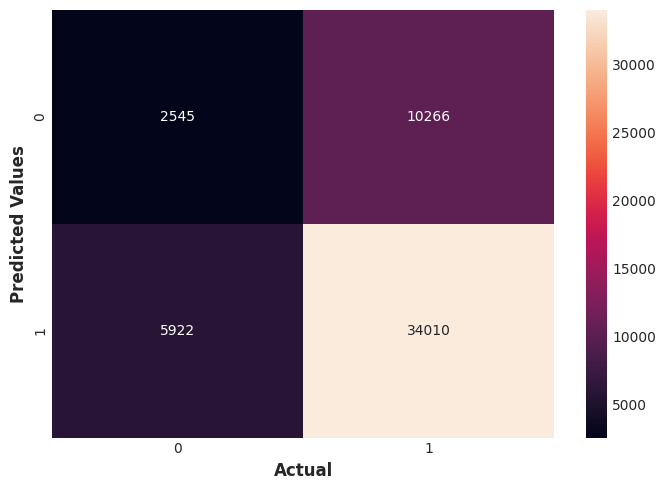


Accuracy: 0.693077754393948

Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.20      0.24     12811
           1       0.77      0.85      0.81     39932

    accuracy                           0.69     52743
   macro avg       0.53      0.53      0.52     52743
weighted avg       0.65      0.69      0.67     52743



In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_rfecv, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador con un valor de k (número de vecinos)
k = 3
clf = KNeighborsClassifier(n_neighbors=k)
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)
# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_Rec_KNN = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)

#### *Decision Trees*

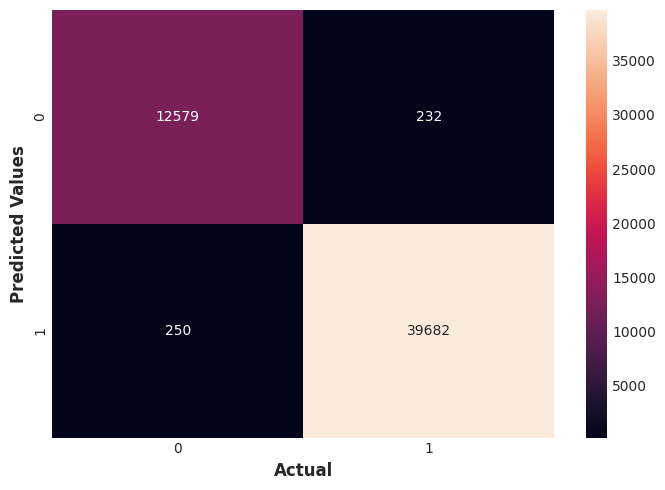


Accuracy: 0.9908613465293973

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     12811
           1       0.99      0.99      0.99     39932

    accuracy                           0.99     52743
   macro avg       0.99      0.99      0.99     52743
weighted avg       0.99      0.99      0.99     52743



In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_tree, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador con un valor de k (número de vecinos)
k = 3
clf = KNeighborsClassifier(n_neighbors=k)
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_dt_KNN = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)

#### *Extra Trees*

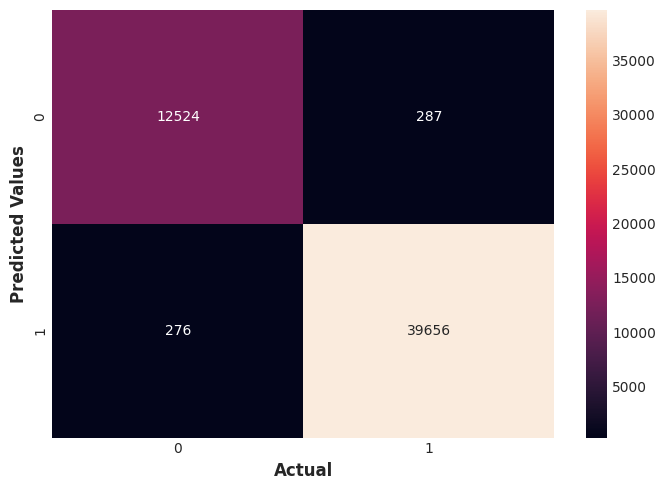


Accuracy: 0.9893255977096487

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     12811
           1       0.99      0.99      0.99     39932

    accuracy                           0.99     52743
   macro avg       0.99      0.99      0.99     52743
weighted avg       0.99      0.99      0.99     52743



In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_extra_trees, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador con un valor de k (número de vecinos)
k = 3
clf = KNeighborsClassifier(n_neighbors=k)
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_extra_KNN = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)

#### *Random Forest*

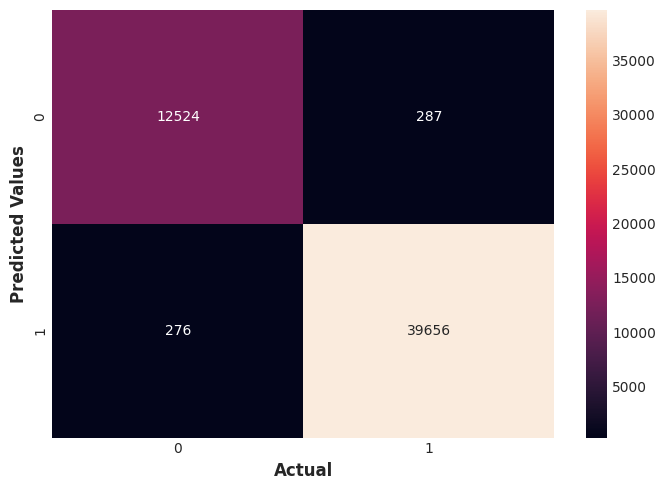


Accuracy: 0.9893255977096487

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     12811
           1       0.99      0.99      0.99     39932

    accuracy                           0.99     52743
   macro avg       0.99      0.99      0.99     52743
weighted avg       0.99      0.99      0.99     52743



In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_random_forest, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador con un valor de k (número de vecinos)
k = 3
clf = KNeighborsClassifier(n_neighbors=k)
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_rf_KNN = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)

### Naïve Bayes
Nos encargamos de hacer el entrenamiento para cada set de datos tomando las diferentes selecciones de caracteristicas.

#### *Original*

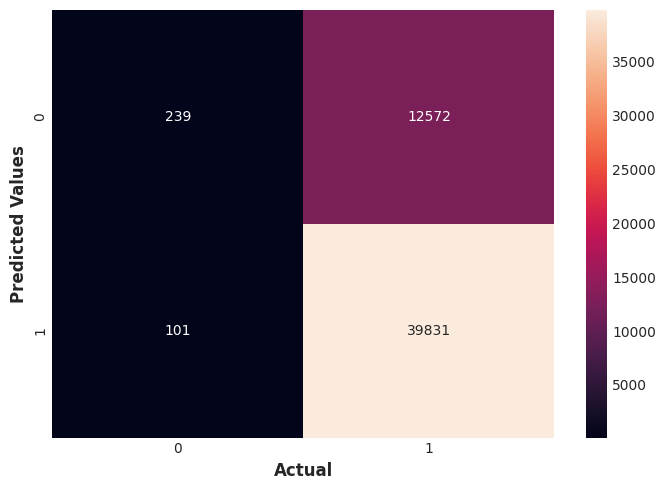

Accuracy: 0.7597216692262481
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.02      0.04     12811
           1       0.76      1.00      0.86     39932

    accuracy                           0.76     52743
   macro avg       0.73      0.51      0.45     52743
weighted avg       0.75      0.76      0.66     52743



In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador
clf = GaussianNB()
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_ori_Nai = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

#### *Bivariate Analysis data*

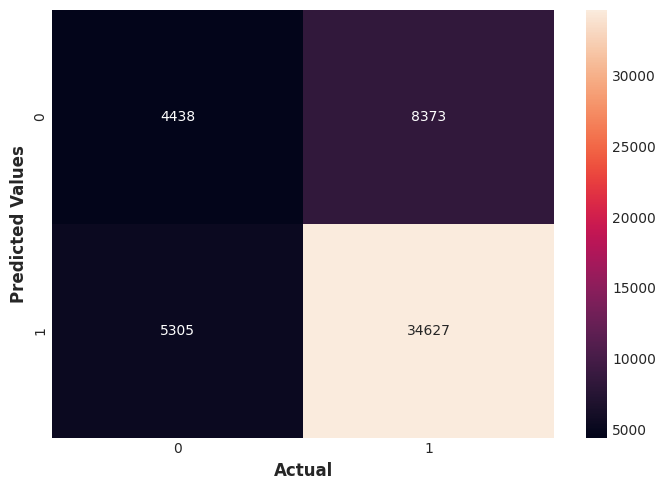

Accuracy: 0.7406670079441822
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.35      0.39     12811
           1       0.81      0.87      0.84     39932

    accuracy                           0.74     52743
   macro avg       0.63      0.61      0.61     52743
weighted avg       0.72      0.74      0.73     52743

Confusion Matrix:
 [[ 4438  8373]
 [ 5305 34627]]


In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_VT, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador
clf = GaussianNB()
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_VT_Nai = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)


#### *Backward Elimination*

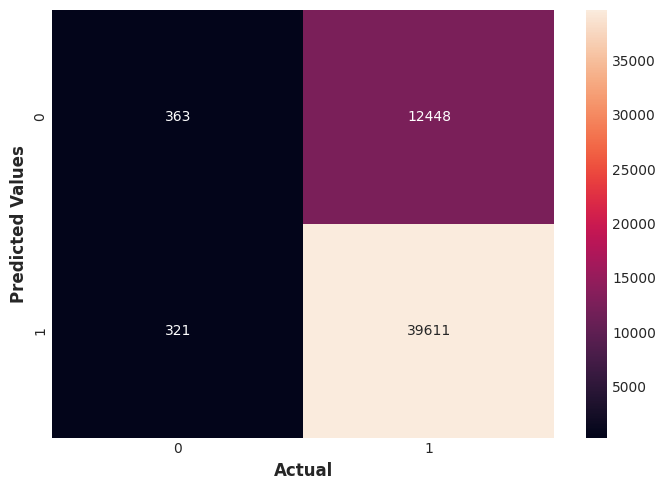


Accuracy: 0.7579015224769163

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.03      0.05     12811
           1       0.76      0.99      0.86     39932

    accuracy                           0.76     52743
   macro avg       0.65      0.51      0.46     52743
weighted avg       0.70      0.76      0.67     52743



In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_backward, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador
clf = GaussianNB()
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_Back_Nai = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)

#### *Recursive Feature Elimination*

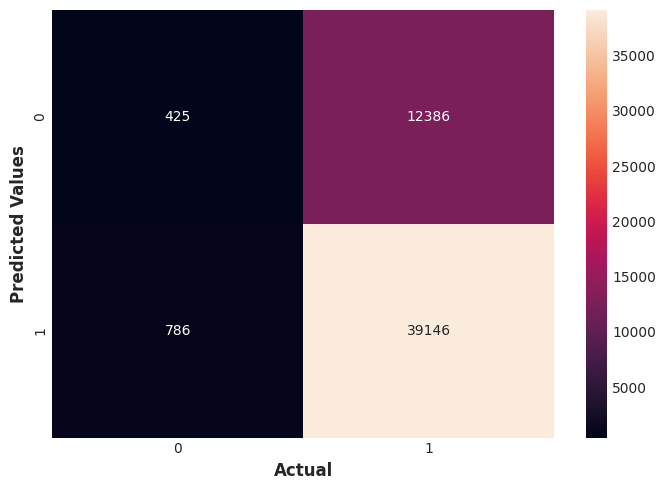


Accuracy: 0.7502606981021178

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.03      0.06     12811
           1       0.76      0.98      0.86     39932

    accuracy                           0.75     52743
   macro avg       0.56      0.51      0.46     52743
weighted avg       0.66      0.75      0.66     52743



In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_rfecv, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador
clf = GaussianNB()
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_Rec_Nai = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)

#### *Decision Trees*

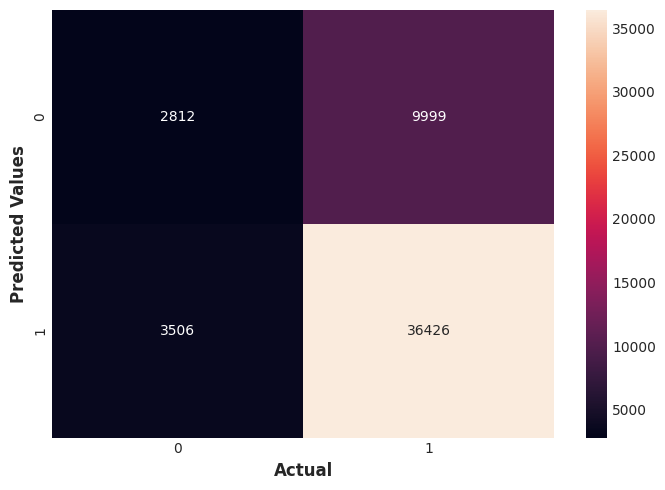


Accuracy: 0.7439470640653736

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.22      0.29     12811
           1       0.78      0.91      0.84     39932

    accuracy                           0.74     52743
   macro avg       0.61      0.57      0.57     52743
weighted avg       0.70      0.74      0.71     52743



In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_tree, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador
clf = GaussianNB()
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_dt_Nai = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)

#### *Extra Trees*

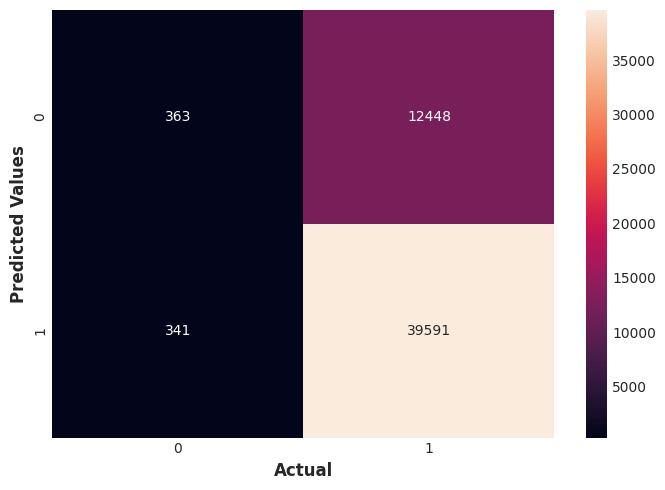


Accuracy: 0.7575223252374723

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.03      0.05     12811
           1       0.76      0.99      0.86     39932

    accuracy                           0.76     52743
   macro avg       0.64      0.51      0.46     52743
weighted avg       0.70      0.76      0.66     52743



In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_extra_trees, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador
clf = GaussianNB()
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_extra_Nai = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)

#### *Random Forest*

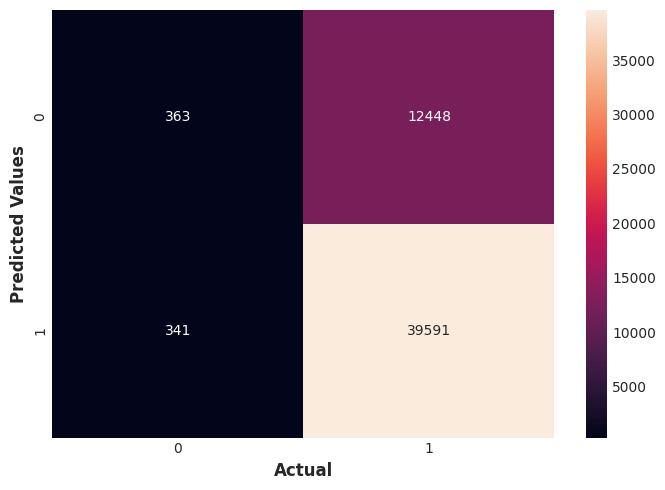


Accuracy: 0.7575223252374723

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.03      0.05     12811
           1       0.76      0.99      0.86     39932

    accuracy                           0.76     52743
   macro avg       0.64      0.51      0.46     52743
weighted avg       0.70      0.76      0.66     52743



In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_random_forest, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador
clf = GaussianNB()
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_rf_Nai = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)

### Arboles de decisión como clasificador
Nos encargamos de hacer el entrenamiento para cada set de datos tomando las diferentes selecciones de caracteristicas.

#### *Original*

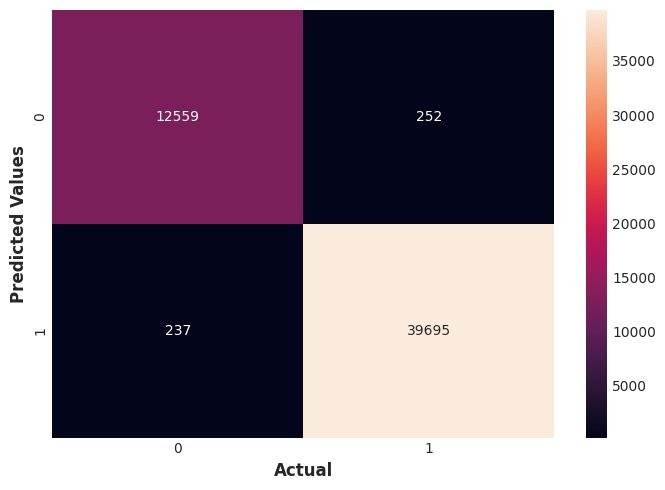

Accuracy: 0.9907286274955919
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     12811
           1       0.99      0.99      0.99     39932

    accuracy                           0.99     52743
   macro avg       0.99      0.99      0.99     52743
weighted avg       0.99      0.99      0.99     52743



In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador
clf = DecisionTreeClassifier()
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_ori_dt = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

#### *Bivariate Analysis data*

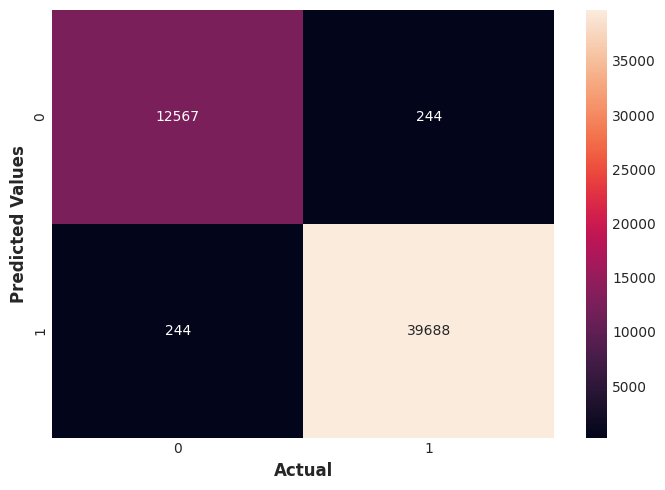

Accuracy: 0.9907475873575641
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     12811
           1       0.99      0.99      0.99     39932

    accuracy                           0.99     52743
   macro avg       0.99      0.99      0.99     52743
weighted avg       0.99      0.99      0.99     52743

Confusion Matrix:
 [[12567   244]
 [  244 39688]]


In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_VT, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador
clf = DecisionTreeClassifier()
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_VT_dt = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)


#### *Backward Elimination*

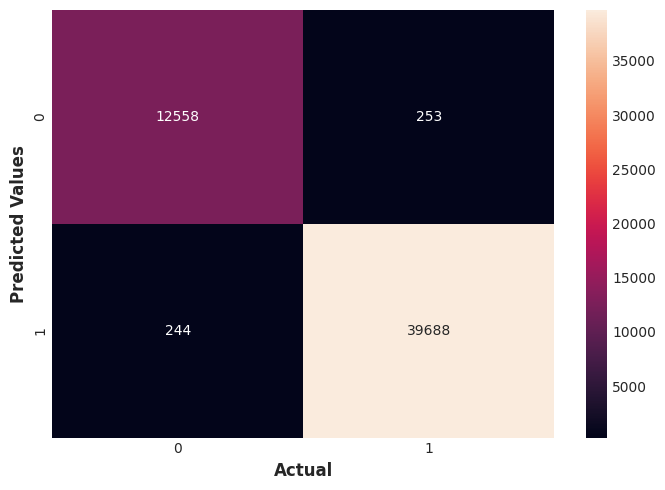


Accuracy: 0.9905769485998142

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     12811
           1       0.99      0.99      0.99     39932

    accuracy                           0.99     52743
   macro avg       0.99      0.99      0.99     52743
weighted avg       0.99      0.99      0.99     52743



In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_backward, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador
clf = DecisionTreeClassifier()
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_Back_dt = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)

#### *Recursive Feature Elimination*

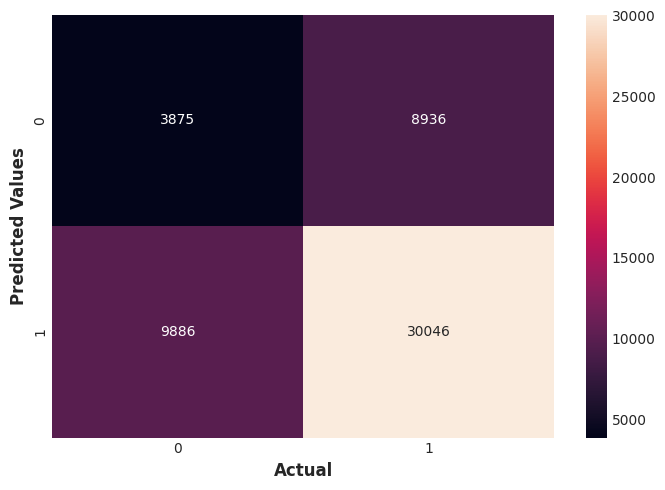


Accuracy: 0.6431374779591604

Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.30      0.29     12811
           1       0.77      0.75      0.76     39932

    accuracy                           0.64     52743
   macro avg       0.53      0.53      0.53     52743
weighted avg       0.65      0.64      0.65     52743



In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_rfecv, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador
clf = DecisionTreeClassifier()
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_Rec_dt = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)

#### *Decision Trees*

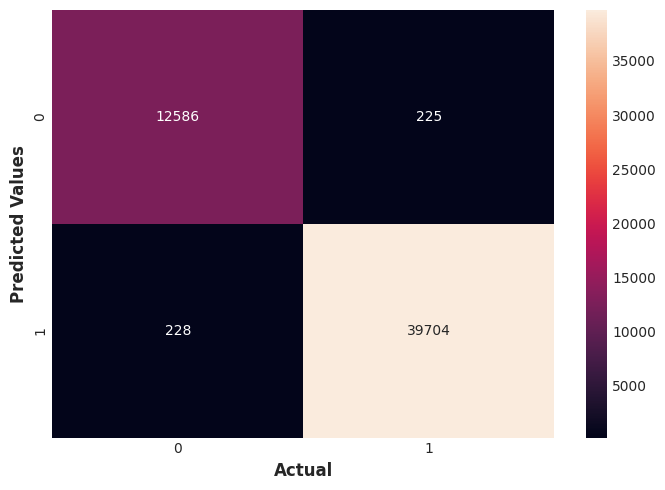


Accuracy: 0.9914111825265912

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     12811
           1       0.99      0.99      0.99     39932

    accuracy                           0.99     52743
   macro avg       0.99      0.99      0.99     52743
weighted avg       0.99      0.99      0.99     52743



In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_tree, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador
clf = DecisionTreeClassifier()
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_dt_dt = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)

#### *Extra Trees*

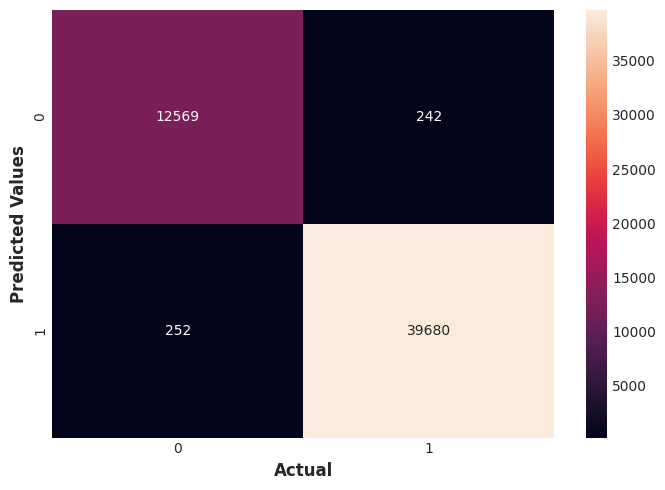


Accuracy: 0.9906338281857308

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     12811
           1       0.99      0.99      0.99     39932

    accuracy                           0.99     52743
   macro avg       0.99      0.99      0.99     52743
weighted avg       0.99      0.99      0.99     52743



In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_extra_trees, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador
clf = DecisionTreeClassifier()
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_extra_dt = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)

#### *Random Forest*

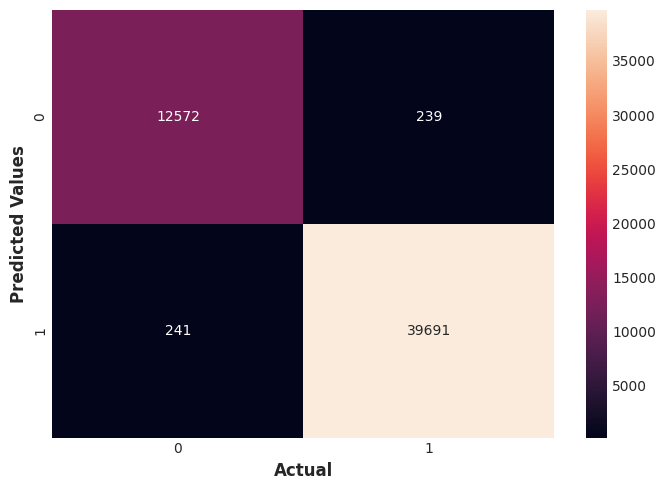


Accuracy: 0.9908992662533417

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     12811
           1       0.99      0.99      0.99     39932

    accuracy                           0.99     52743
   macro avg       0.99      0.99      0.99     52743
weighted avg       0.99      0.99      0.99     52743



In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_random_forest, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador
clf = DecisionTreeClassifier()
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_rf_dt = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)

### Adaboost
Nos encargamos de hacer el entrenamiento para cada set de datos tomando las diferentes selecciones de caracteristicas.

#### *Original*

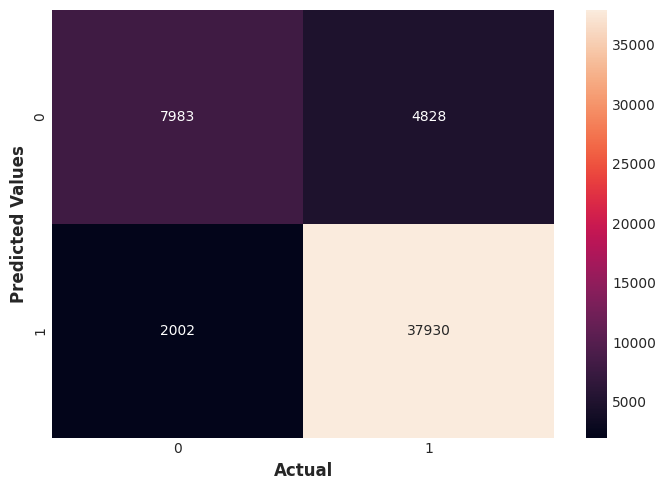

Accuracy: 0.8705041427298409
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.62      0.70     12811
           1       0.89      0.95      0.92     39932

    accuracy                           0.87     52743
   macro avg       0.84      0.79      0.81     52743
weighted avg       0.87      0.87      0.86     52743



In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador
clf = AdaBoostClassifier()
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_ori_ada = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

#### *Bivariate Analysis data*

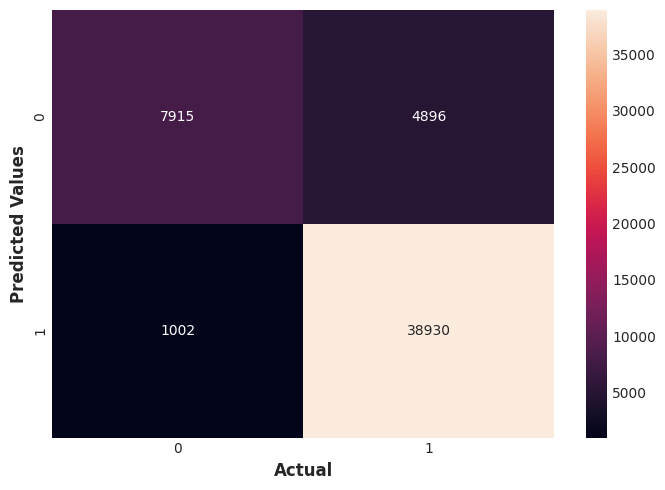

Accuracy: 0.8881747340879358
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.62      0.73     12811
           1       0.89      0.97      0.93     39932

    accuracy                           0.89     52743
   macro avg       0.89      0.80      0.83     52743
weighted avg       0.89      0.89      0.88     52743

Confusion Matrix:
 [[ 7915  4896]
 [ 1002 38930]]


In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_VT, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador
clf = AdaBoostClassifier()
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_VT_ada = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)


#### *Backward Elimination*

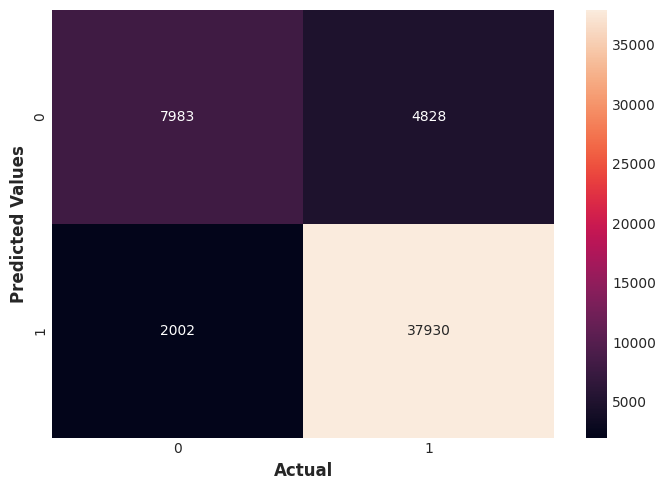


Accuracy: 0.8705041427298409

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.62      0.70     12811
           1       0.89      0.95      0.92     39932

    accuracy                           0.87     52743
   macro avg       0.84      0.79      0.81     52743
weighted avg       0.87      0.87      0.86     52743



In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_backward, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador
clf = AdaBoostClassifier()
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_Back_ada = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)

#### *Recursive Feature Elimination*

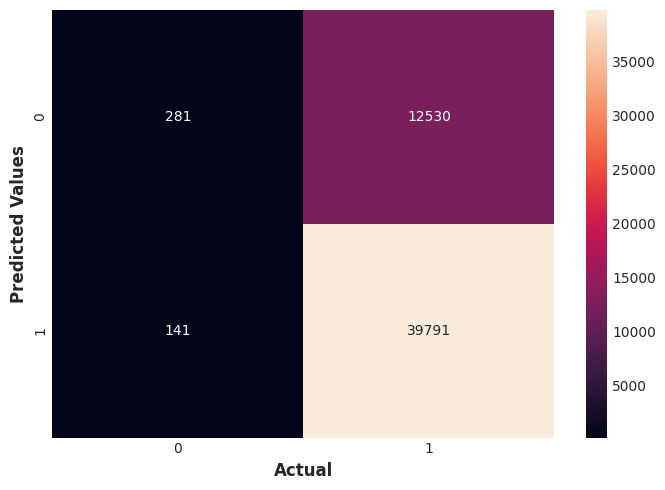


Accuracy: 0.7597595889501925

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.02      0.04     12811
           1       0.76      1.00      0.86     39932

    accuracy                           0.76     52743
   macro avg       0.71      0.51      0.45     52743
weighted avg       0.74      0.76      0.66     52743



In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_rfecv, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador
clf = AdaBoostClassifier()
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_Rec_ada = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)

#### *Decision Trees*

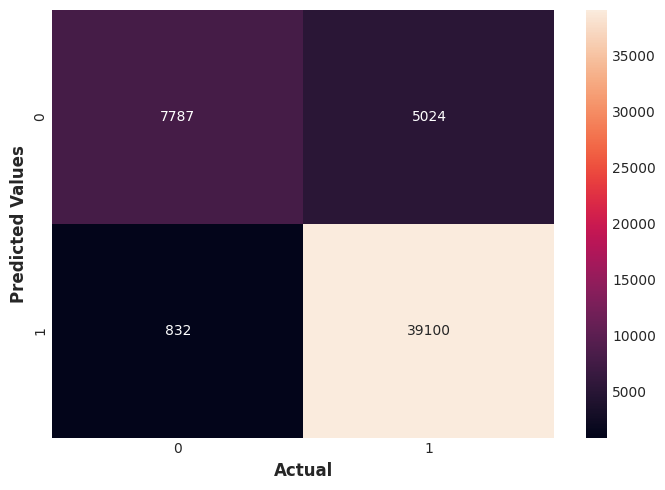


Accuracy: 0.8889710482907685

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.61      0.73     12811
           1       0.89      0.98      0.93     39932

    accuracy                           0.89     52743
   macro avg       0.89      0.79      0.83     52743
weighted avg       0.89      0.89      0.88     52743



In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_tree, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador
clf = AdaBoostClassifier()
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_dt_ada = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)

#### *Extra Trees*

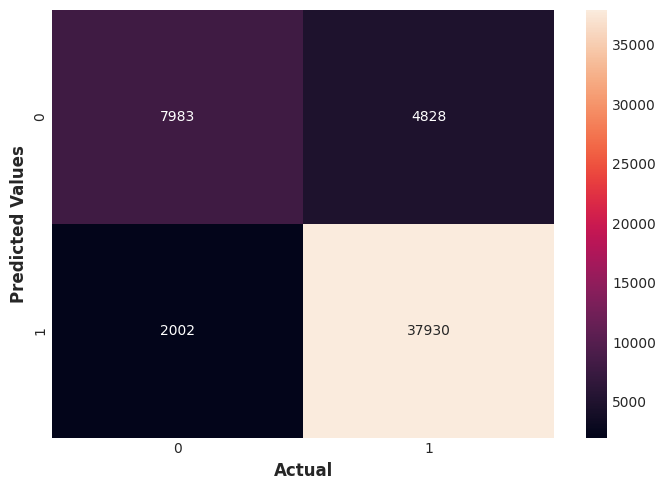


Accuracy: 0.8705041427298409

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.62      0.70     12811
           1       0.89      0.95      0.92     39932

    accuracy                           0.87     52743
   macro avg       0.84      0.79      0.81     52743
weighted avg       0.87      0.87      0.86     52743



In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_extra_trees, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador
clf = AdaBoostClassifier()
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_extra_ada = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)

#### *Random Forest*

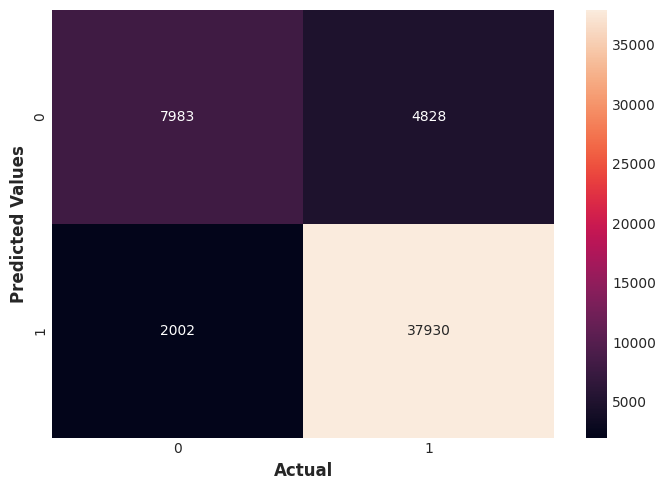


Accuracy: 0.8705041427298409

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.62      0.70     12811
           1       0.89      0.95      0.92     39932

    accuracy                           0.87     52743
   macro avg       0.84      0.79      0.81     52743
weighted avg       0.87      0.87      0.86     52743



In [ ]:
#Hacemos la separación de datos en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X_random_forest, y, test_size=0.1, random_state=42, shuffle=True)

# Inicializar el clasificador
clf = AdaBoostClassifier()
# Entrenar el clasificador
clf.fit(X_train, y_train)
# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
accuracy_rf_ada = accuracy
# Mostrar el reporte de métricas
report = classification_report(y_test, y_pred)
# Calcular y mostrar la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True, fmt="g")
plt.xlabel("Actual")
plt.ylabel("Predicted Values")
plt.show()

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", report)

# Comparacion de los modelos 📊

Una vez observados los reportes de rendimiento y la matriz de confusión de cada caso, veamos una comparación del accuracy en cada modelo con cada selección de caractaeristicas hecha.

In [ ]:
#Definimos las listas de cada accuracy

Clas_Log = [accuracy_ori_RL, accuracy_VT_RL, accuracy_Back_RL, accuracy_Rec_RL, accuracy_dt_RL, accuracy_extra_RL, accuracy_rf_RL]
Clas_KNN = [accuracy_ori_KNN, accuracy_VT_KNN, accuracy_Back_KNN, accuracy_Rec_KNN, accuracy_dt_KNN, accuracy_extra_KNN, accuracy_rf_KNN]
Clas_Nai = [accuracy_ori_Nai, accuracy_VT_Nai, accuracy_Back_Nai, accuracy_Rec_Nai, accuracy_dt_Nai, accuracy_extra_Nai, accuracy_rf_Nai]
Clas_dt = [accuracy_ori_dt, accuracy_VT_dt, accuracy_Back_dt, accuracy_Rec_dt, accuracy_dt_dt, accuracy_extra_dt, accuracy_rf_dt]
Clas_ada = [accuracy_ori_ada, accuracy_VT_ada, accuracy_Back_ada, accuracy_Rec_ada, accuracy_dt_ada, accuracy_extra_ada, accuracy_rf_ada]

In [ ]:
from prettytable import PrettyTable

# Crear una tabla
tabla = PrettyTable()
tabla.field_names = ["Modelo", "Original", "Bivariate Analisis", "Backward Elimination", "Recursive Feature Elimination", "Decision tree selection", "Extra trees selection", "Random Forest selection"]

# Agregar filas a la tabla
tabla.add_row(["Regresión Logistica"] + Clas_Log)
tabla.add_row(["KNN"] + Clas_KNN)
tabla.add_row(["Naïve Bayes"] + Clas_Nai)
tabla.add_row(["Decision tree"] + Clas_dt)
tabla.add_row(["Adaboost"] + Clas_ada)

# Agregar un título a la tabla
tabla.title = "Accuracy por modelo y dataset"

# Imprimir la tabla
print(tabla)


+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                                  Accuracy por modelo y dataset                                                                                   |
+---------------------+--------------------+--------------------+----------------------+-------------------------------+-------------------------+-----------------------+-------------------------+
|        Modelo       |      Original      | Bivariate Analisis | Backward Elimination | Recursive Feature Elimination | Decision tree selection | Extra trees selection | Random Forest selection |
+---------------------+--------------------+--------------------+----------------------+-------------------------------+-------------------------+-----------------------+-------------------------+
| Regresión Log

De entrada los peores modelos fueron los de Regresión logistica y Naïve Bayes, observando la matriz de confusión vemos directamente que el llegar a 0.75 es debido a que la clasificación estuvo directamente cargada hacia una clase. Esto siendo para todas las selecciones de caracteristicas.

Hablando ya de la forma en como se seleccionaron las caracteristicas, en general el recursive feature elimination fue el dataset con los resultados mas bajos en todos los modelos. EL clasificador que le sigue a la Regresión logistica y Naïve Bayes es el de adaboost, que observando la distribución de las matrices de confusión vemos una cuestión más balanceada en cada miembro.

Los mejores clasificadores fueron los de KNN y decision tree. Obteniendo valores del 90%. Los mejores valores para el KNN fue el del dataset original con 0.99325 y del decision tree selection con 0.990861. Con el decision tree tenemos más valores del 0.99, donde el mejor fue el de la selección con decision tree con 0.991411, de ahí seguiria el de Random Forest con 0.990899 y luego el del Bivariate Analisis con 0.990747.

En promedio las caracteristicas seleccionadas por el Decision tree selection fueron los que tuvieron los mejores resultados, que realemnte usó las misma caracteristicas originales pero aqui se hizo una normalización y estandarización lo cula valió para tener los mejores resultados

# ⚠️ Importante
## Ejecutar esta celda antes de ejecutar *TODAS* las anteriores❗

Importamos y descargamos librerias y hacemos los ajustes necesarios en formato para el codigo.

In [ ]:
# Dependencias
from sklearn.feature_selection import VarianceThreshold, mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.metrics.cluster import silhouette_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from datetime import datetime
import locale
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#Librerias externas que hay que instalar a colab
!pip install xgboost
!pip install lightgbm

#Settings para los graficos realizados
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)

plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)

<ipython-input-1-61655fd00501>:40: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


Montamos el Drive, ya que de aquí traeremos los datos

In [ ]:
# Montar drive
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


Definimos funciones para el codigo.

In [ ]:
def load_data(path:str, file_name:str)->pd.DataFrame:
  # Montar el drive
  path_ = '/content/gdrive/MyDrive/' + path

  type_file = file_name.split('.')[1]

  if type_file == 'xlsx':
    print("loaded file: " + path_ + file_name)
    return pd.read_excel(path_ + file_name)
  elif type_file == 'csv':
    print("loaded file: " + path_ + file_name)
    return pd.read_csv(path_ + file_name)
  else:
    raise AttributeError("type file not valid")

def data_exploration(data:pd.DataFrame)-> pd.DataFrame:
  exploration = pd.DataFrame(columns = data.columns,
                           index=['type','null_counts','uniques'])
  # shape of dataframe
  shape = data.shape
  #data['shape rows'] = shape[0]
  # num of nulls per column
  null_counts = data.isnull().sum()
  exploration.loc['null_counts'] = null_counts
  # categorical or numeric data columns
  cat_cols = [col for col in data.columns if col not in data.describe().columns]
  num_cols = data._get_numeric_data().columns
  exploration.loc['type', cat_cols] = 'categorical'
  exploration.loc['type', num_cols] = 'numeric'
  # unique values
  exploration.loc['uniques', data.nunique().index] = data.nunique().values

  return exploration